In [1]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import QuarkTM

In [2]:
qrange = linspace(0, 5, 51)
erange = linspace(-5, 5, 201)

In [3]:
g = QuarkTM.Particle(1, qrange, erange, stat='b')

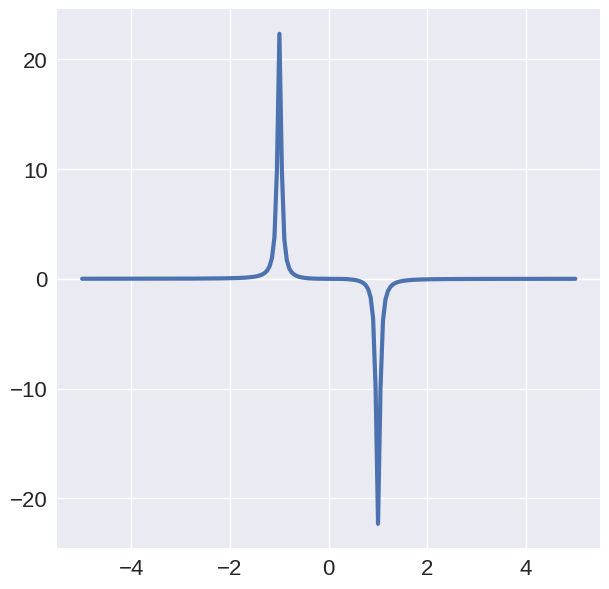

## BB channel

In [4]:
ch = Channel(g, g, 0.2, calc=3)
ch2 = Channel(g, g, 0.2, calc=2)

In [5]:
ch.populate_T()
ch2.populate_T()

  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

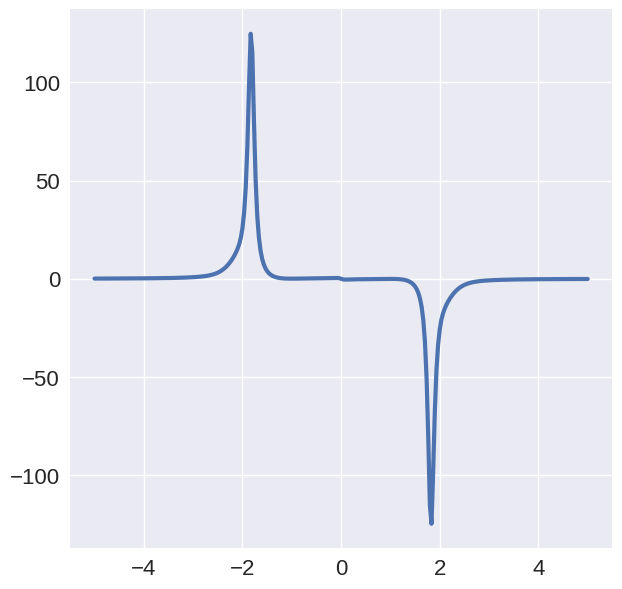

In [76]:
plt.plot(erange, imag(ch.TM[:, 0]))

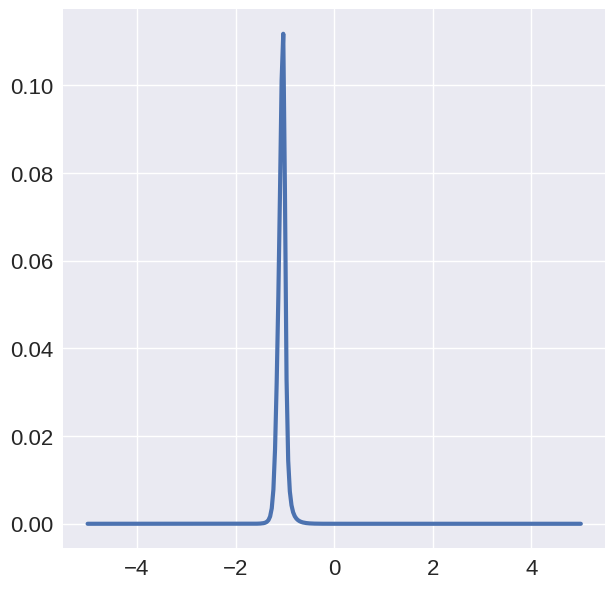

In [77]:
plt.plot(erange, array([tm.sigma_integrand_bb(e, 3, 0, 0.2, ch.iImT, g.iImG) for e in erange]))

In [78]:
quad(lambda e: tm.sigma_integrand_bb(e, 3, 0, 0.2, ch.iImT, g.R), -5, 5)

/tmp/ipykernel_4694/940137029.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(lambda e: tm.sigma_integrand_bb(e, 3, 0, 0.2, ch.iImT, g.R), -5, 5)


(-0.03662851808278471, 4.086661712681544e-05)

In [79]:
tm.sigma_bb3(3, 0, 0.2, ch.iImT, g.R)

-0.03144351493350617

In [80]:
tm.sigma_bb3(3, 0, 0.2, ch.iImT, g.R)

-0.03144351493350617

In [81]:
sig = array([tm.sigma_bb3(e, 0, 0.2, ch.iImT, g.iImG) for e in erange])
sig2 = array([tm.sigma_bb2(e, 0, 0.2, ch.iImT, g.iImG) for e in erange])

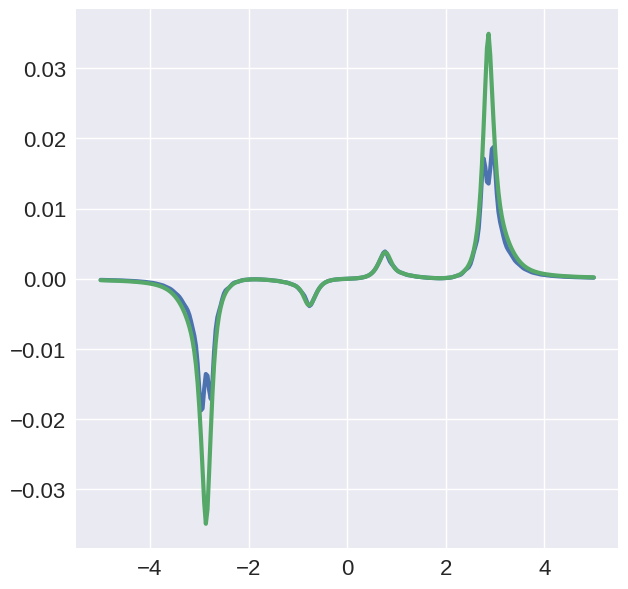

In [82]:
plt.plot(erange, sig)
plt.plot(erange, sig2)

In [46]:
ch.populate_S()

  0%|          | 0/201 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [25]:
tm.sigma_bb2(3, 0, 0.2, ch.iImT, g.iImG)

0.01851243655557698

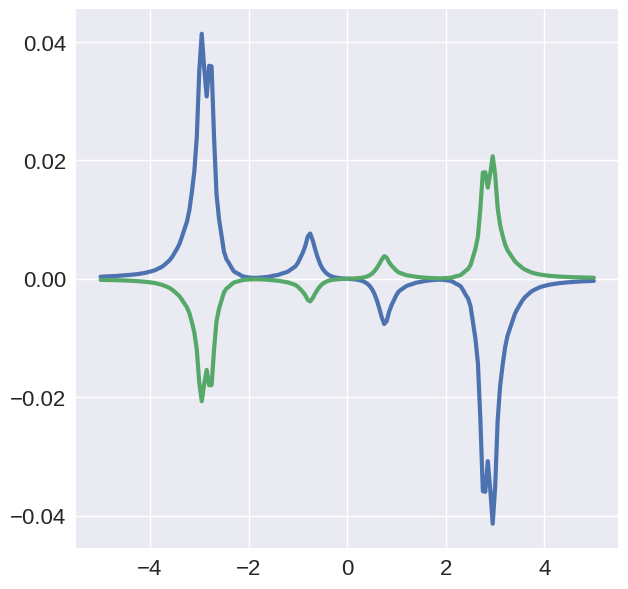

In [37]:
plt.plot(erange, ch.ImS[:, 0])
plt.plot(erange, sig2)

In [16]:
ch.populate_S()

  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

In [13]:
ch2.populate_S()

  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

In [26]:
tm.sigma_bb(3, 0, 0.2, ch.iImT, g.iImG)

0.017538633146780797

AttributeError: 'Channel' object has no attribute 'ImS'

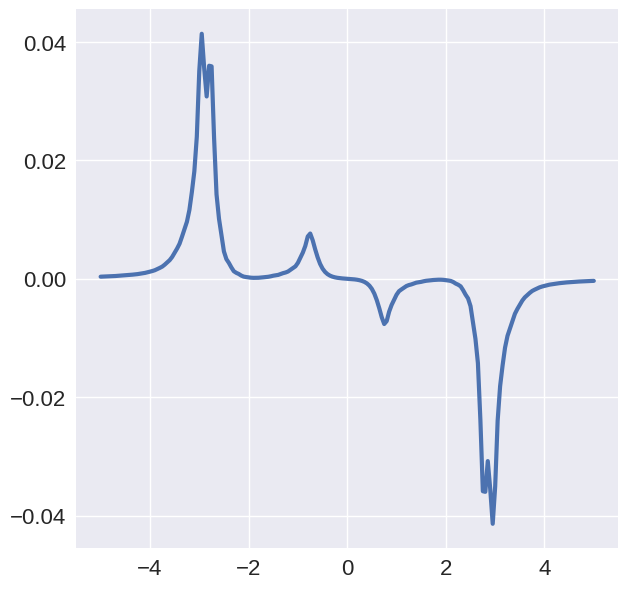

In [47]:
plt.plot(erange, ch.ImS[:, 0])
plt.plot(erange, ch2.ImS[:, 0])

## Test the GQ self-energy

In [6]:
q = QuarkTM.Particle(0.5, qrange, erange)

In [7]:
ch_gq = QuarkTM.Channel(g, q, 0.2)

In [8]:
ch_gq.populate_T()

  0%|          | 0/201 [00:00<?, ?it/s]

In [21]:
ch_qg.func

<function TMQGP.sigma_bf(om, p, T, iImT, iImG)>

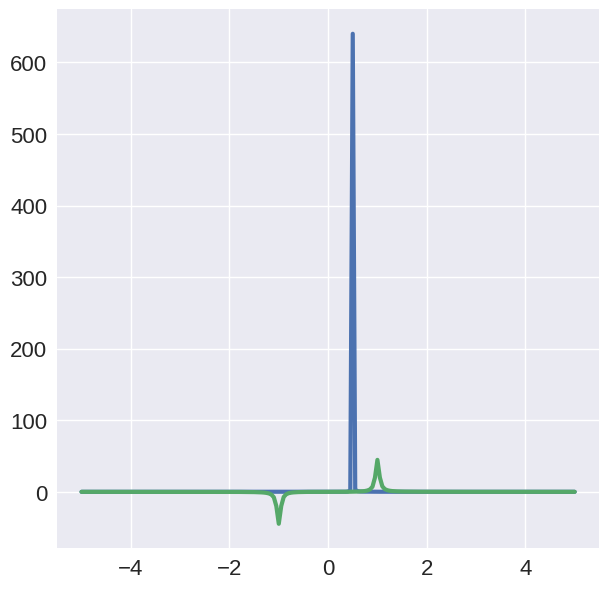

In [7]:
plt.plot(erange, q.Rtab[:, 0])
plt.plot(erange, g.Rtab[:, 0])

/usr/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


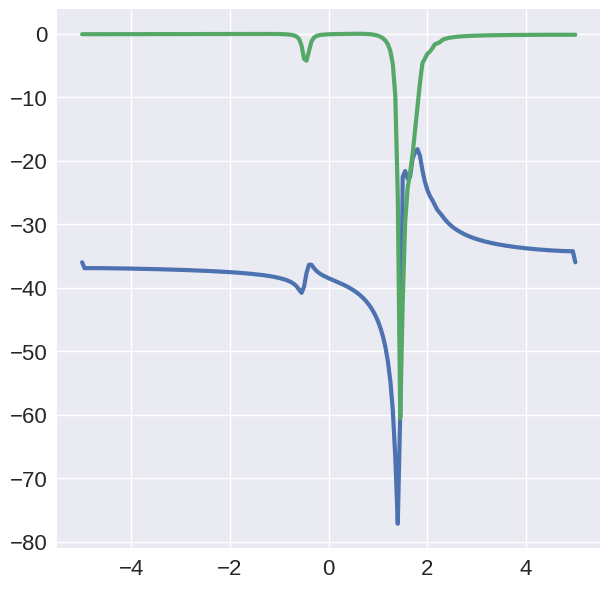

In [8]:
plt.plot(erange, ch_gq.TM[:, 0])
plt.plot(erange, imag(ch_gq.TM[:, 0]))


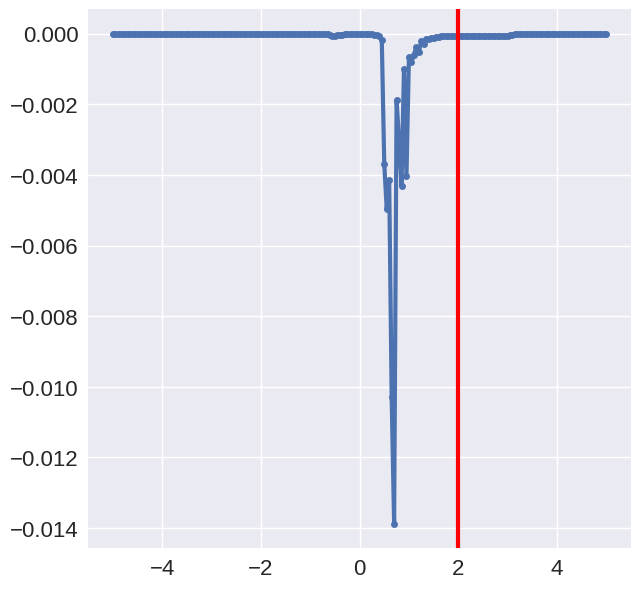

In [9]:
om = 2

plt.plot(erange, [tm.k_integral_cm2(e, om, 0, ch_gq.iImT, q.R) for e in erange],
        marker='.')

plt.axvline(om, c='red')

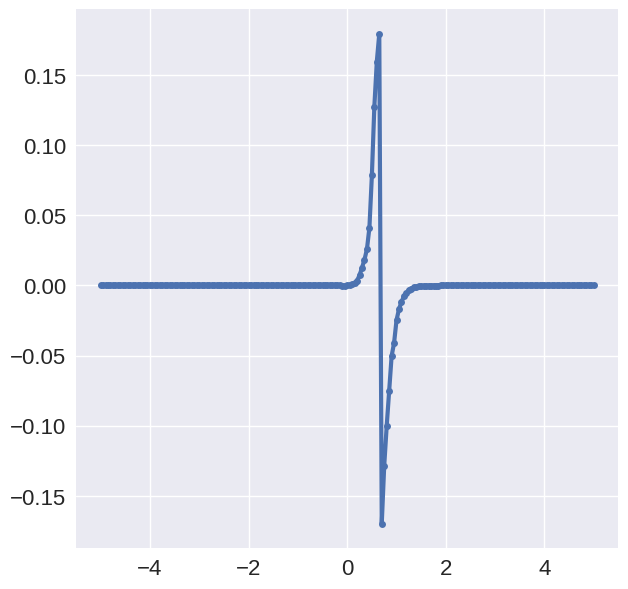

In [38]:
plt.plot(erange, [tm.sigma_integrand_bf(e, .7, 0, 0.2, ch_qq.iImT, q.R) for e in erange],
        marker='.')



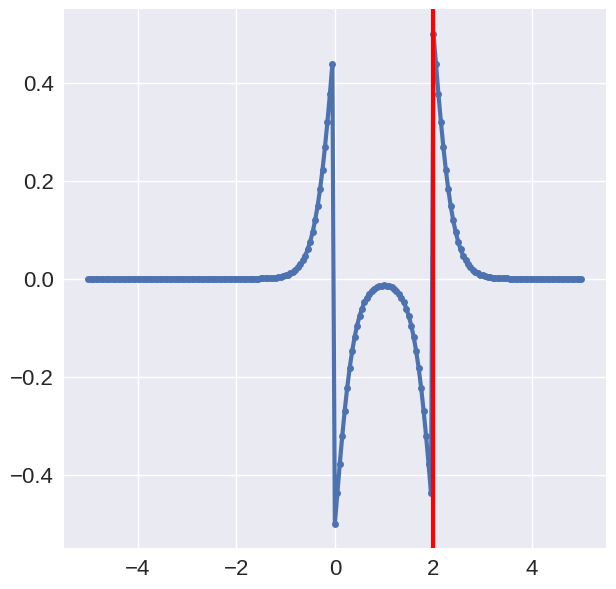

In [10]:
om = 2

plt.plot(erange, [tm.n_f(e - om, 0.2) - tm.n_f(e, 0.2) for e in erange],
        marker='.')

plt.axvline(om, c='red')

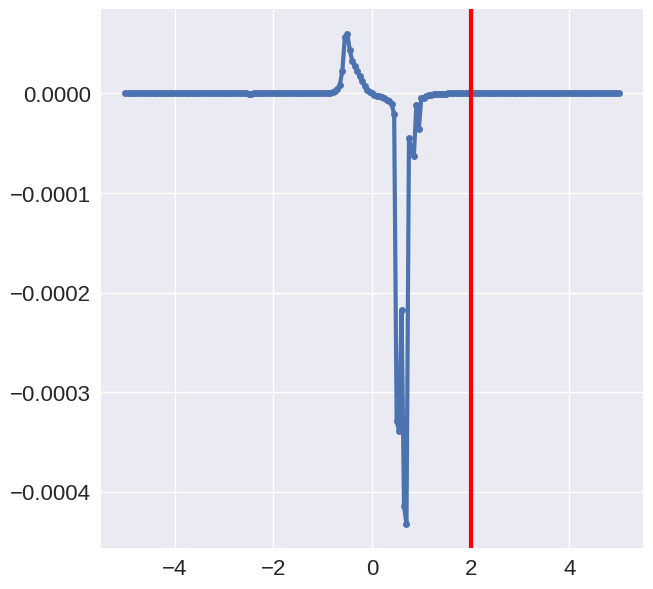

In [11]:
om = 2

plt.plot(erange, [tm.sigma_integrand_bb(e, om, 0, 0.2, ch_gq.iImT, q.R) for e in erange],
        marker='.')

plt.axvline(om, c='red')

In [15]:
ch_gq.populate_S()

  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

In [7]:
sig = array([ch_gq.func(e, 0, 0.2, ch_gq.iImT, q.R) for e in erange])

In [14]:
plt.plot(erange, ch_qg.)

SyntaxError: invalid syntax (125226449.py, line 1)

<function TMQGP.sigma_bf(om, p, T, iImT, iImG)>

AttributeError: 'Channel' object has no attribute 'ImS'

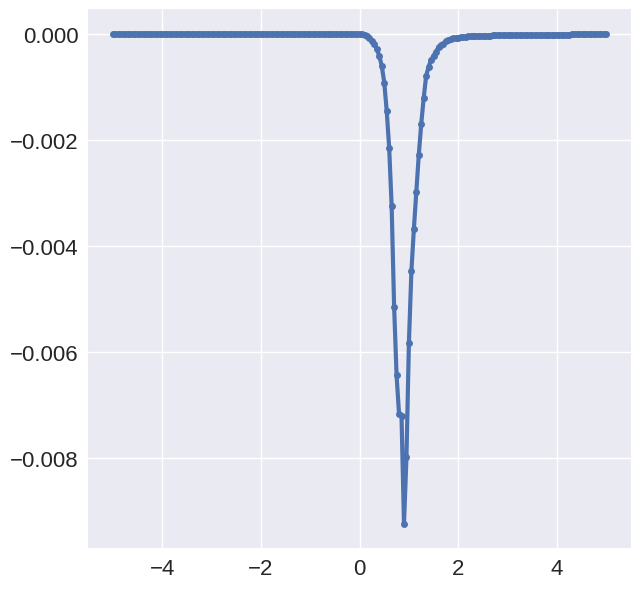

In [8]:
plt.plot(erange, sig, marker='.')
plt.plot(erange, ch_gq.ImS[:, 0], ls=':')
# plt.ylim(-0.001, 0.001)

In [38]:
ch_qg.p_j.stat

'f'

In [18]:
ch_qq = QuarkTM.Channel(q, q, 0.2)

In [19]:
ch_qq.populate_T()

  0%|          | 0/201 [00:00<?, ?it/s]

## QG case

In [9]:
ch_qg = QuarkTM.Channel(q, g, 0.2)

In [10]:
ch_qg.populate_T()

  0%|          | 0/201 [00:00<?, ?it/s]

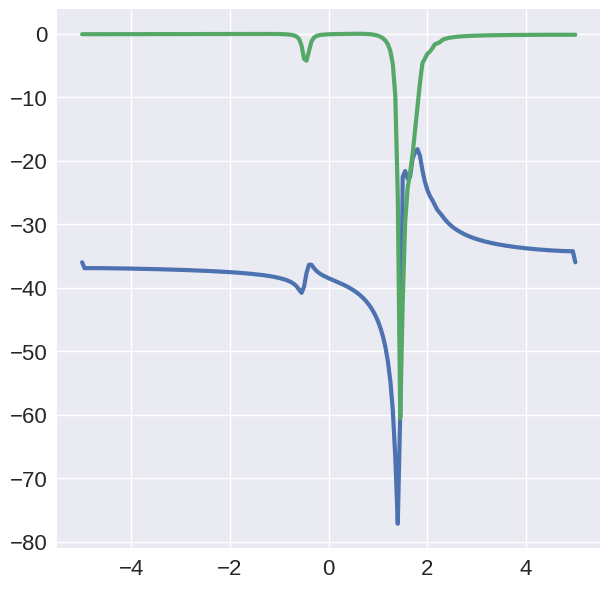

In [11]:
plt.plot(erange, real(ch_qg.TM[:, 0]))
plt.plot(erange, imag(ch_qg.TM[:, 0]))

In [24]:
sig = array([tm.sigma_fb(e, 0, 0.2, ch_qg.iImT, g.R) for e in erange])

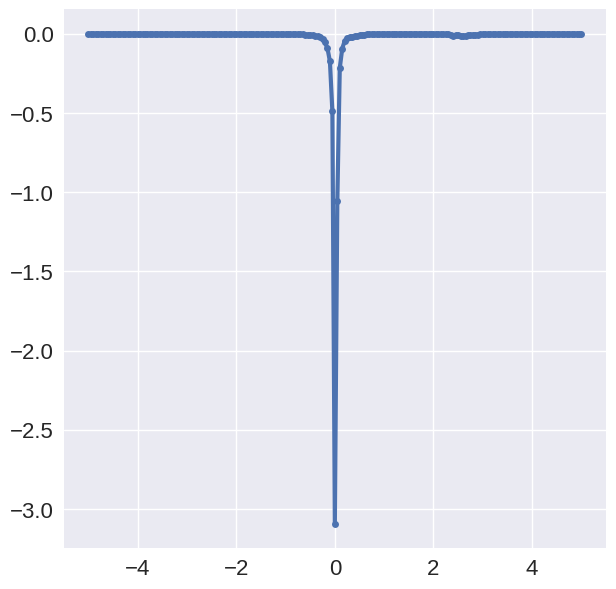

In [37]:
plt.plot(erange, sig, marker='.')
# plt.ylim(-0.1, 0.1)

In [30]:
ch_qg.func

<function TMQGP.sigma_fb(om, p, T, iImT, iImG)>

/tmp/ipykernel_25476/2393011754.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(lambda e: tm.sigma_integrand_fb(e, om, 0, 0.2, ch_qg.iImT, g.R), -5, 5)


(-2.7969951321532913, 0.5107976665841591)

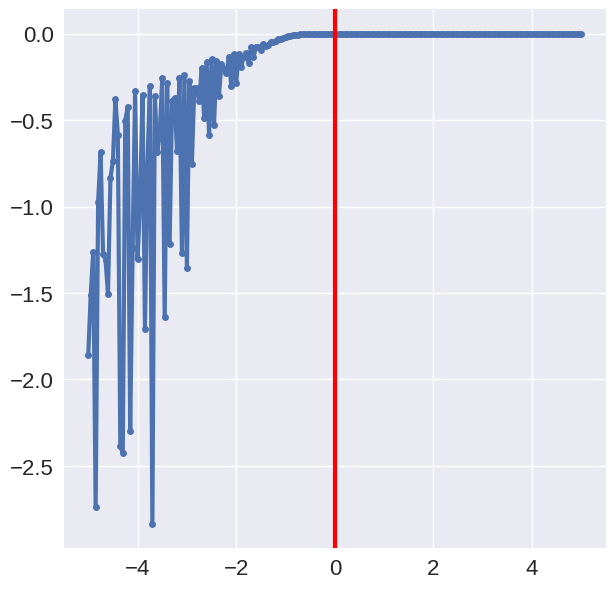

In [32]:
om = 0

plt.plot(erange, [tm.sigma_integrand_fb(e, om, 0, 0.2, ch_qg.iImT, g.R) for e in erange],
        marker='.')

plt.axvline(om, c='red')

quad(lambda e: tm.sigma_integrand_fb(e, om, 0, 0.2, ch_qg.iImT, g.R), -5, 5)

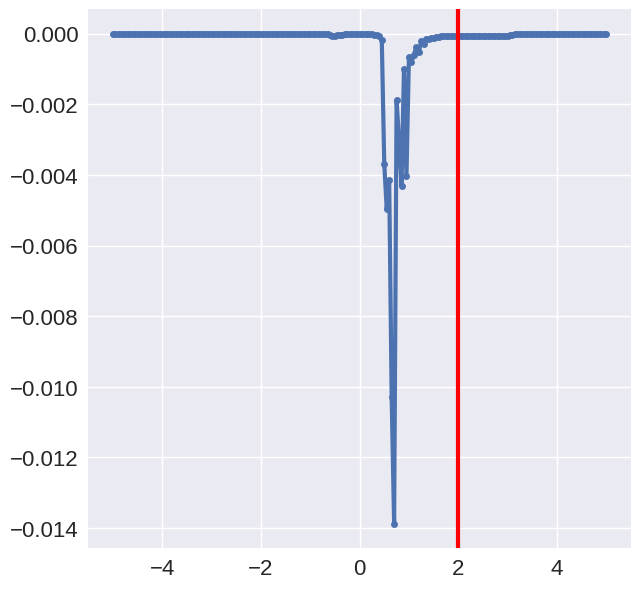

In [33]:
om = 2

plt.plot(erange, [tm.k_integral_cm2(e, om, 0, ch_qg.iImT, q.R) for e in erange],
        marker='.')

plt.axvline(om, c='red')

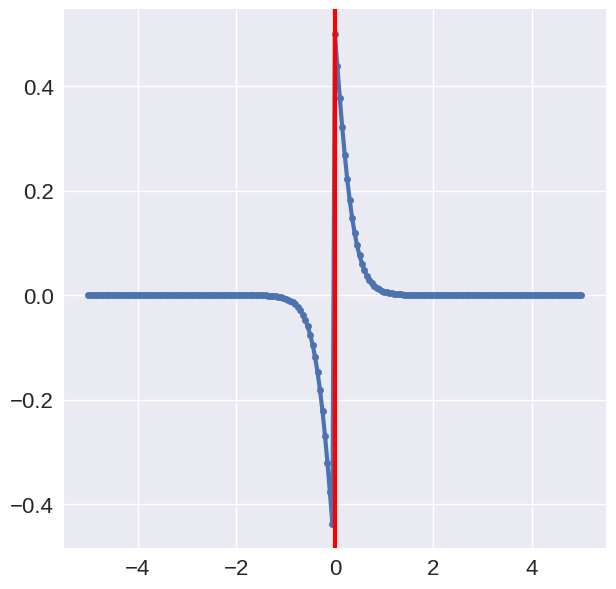

In [39]:
om = 0

plt.plot(erange, [0*tm.n_b(e, 0.2) + tm.n_f(e + om, 0.2) for e in erange],
        marker='.')

plt.axvline(om, c='red')